# Feature importance

In [15]:
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [16]:
data = pd.read_csv(r'../data/dataset_merged_with_price.csv', index_col=0)
data.head()

,active_addresses,tweets,top_100_percent,difficulty,transactions,market_cap,median_transaction_value,send_usd,google_trends,block_size,...,median_transaction_size,fee_reward,av_transaction_value,FEDFUNDS,gold_open,gold_high,gold_low,gold_close,gold_volume,btc_price
2015-08-01,267062.0,26960.0,20.930,5.227830e+10,147326.0,4.006359e+09,53.549,219635191.0,10.689,729761.0,...,0.0281,0.837,1502.0,0.14,1095.72,1097.68,1085.79,1086.66,0,280.980
2015-08-02,260292.0,24294.0,20.933,5.227830e+10,103449.0,4.009289e+09,48.114,180286651.0,9.299,428099.0,...,0.0280,0.549,1827.0,0.14,1095.72,1097.68,1085.79,1086.66,0,280.317
2015-08-03,247772.0,35036.0,20.948,5.227830e+10,119687.0,4.040683e+09,72.779,289689678.0,7.803,454890.0,...,0.0283,0.686,2436.0,0.14,1095.72,1097.68,1085.79,1086.66,78495,282.591
2015-08-04,260149.0,34486.0,20.826,5.227830e+10,132411.0,4.044523e+09,129.195,332340266.0,7.482,797497.0,...,0.0369,1.025,2510.0,0.14,1085.32,1094.78,1080.94,1087.61,85634,283.586
2015-08-05,280613.0,31470.0,20.768,5.227830e+10,133625.0,4.022246e+09,123.216,347586782.0,7.268,800884.0,...,0.0334,1.010,2627.0,0.14,1087.31,1092.48,1082.92,1084.77,85788,282.593


In [17]:
# 🔍 DATASET COMPATIBILITY VERIFICATION  
print("🔍 FEATURE IMPORTANCE DATASET CHECK")
print("=" * 60)

# Verify dataset file and structure
dataset_file = '../data/dataset_merged_with_price.csv'
print(f"✅ Dataset file: {dataset_file}")
print(f"✅ Dataset shape: {data.shape}")

# Check for target variable
if 'btc_price' in data.columns:
    print(f"✅ Target variable 'btc_price' found")
else:
    print(f"❌ Target variable 'btc_price' missing!")

# Show available features for analysis
print(f"\n📊 Available features for importance analysis:")
feature_cols = [col for col in data.columns if col != 'btc_price']
print(f"   Total features: {len(feature_cols)}")

# Check for previously problematic columns
problematic_cols = ['av_transaction_size', 'full_name', 'coin', 'confirmation_time']
found_problematic = [col for col in problematic_cols if col in data.columns]
if found_problematic:
    print(f"⚠️ Found problematic columns: {found_problematic}")
else:
    print(f"✅ All problematic columns removed during preprocessing")

print(f"✅ Dataset is compatible with Feature Importance analysis")
print("=" * 60)

🔍 FEATURE IMPORTANCE DATASET CHECK
✅ Dataset file: ../data/dataset_merged_with_price.csv
✅ Dataset shape: (1976, 23)
✅ Target variable 'btc_price' found

📊 Available features for importance analysis:
   Total features: 22
✅ All problematic columns removed during preprocessing
✅ Dataset is compatible with Feature Importance analysis


Analyse the feature importance: 

In [18]:
# Smart feature selection - only use features that exist in the processed dataset
desired_features = ["tweets", "top_100_percent", "difficulty", "transactions", "market_cap", "active_addresses",
                    "google_trends", "mining_profitability", "hashrate", "sent_addresses", "median_transaction_size", 
                    "median_transaction_value", "block_size", "fee_reward", "av_transaction_value",
                    "FEDFUNDS", "gold_open", "gold_high", "gold_low", "gold_close", "gold_volume"]

# Only select features that actually exist in the dataset
available_features = [col for col in desired_features if col in data.columns]
missing_features = [col for col in desired_features if col not in data.columns]

if missing_features:
    print(f"⚠️ Features not found in dataset: {missing_features}")
    
print(f"✅ Using available features: {len(available_features)} out of {len(desired_features)} desired")

X = data[available_features].dropna()
print(f"Features shape: {X.shape}")
print(f"Features selected: {list(X.columns)}")
print(X.head())

✅ Using available features: 21 out of 21 desired
Features shape: (1976, 21)
Features selected: ['tweets', 'top_100_percent', 'difficulty', 'transactions', 'market_cap', 'active_addresses', 'google_trends', 'mining_profitability', 'hashrate', 'sent_addresses', 'median_transaction_size', 'median_transaction_value', 'block_size', 'fee_reward', 'av_transaction_value', 'FEDFUNDS', 'gold_open', 'gold_high', 'gold_low', 'gold_close', 'gold_volume']
             tweets  top_100_percent    difficulty  transactions  \
2015-08-01  26960.0           20.930  5.227830e+10      147326.0   
2015-08-02  24294.0           20.933  5.227830e+10      103449.0   
2015-08-03  35036.0           20.948  5.227830e+10      119687.0   
2015-08-04  34486.0           20.826  5.227830e+10      132411.0   
2015-08-05  31470.0           20.768  5.227830e+10      133625.0   

              market_cap  active_addresses  google_trends  \
2015-08-01  4.006359e+09          267062.0         10.689   
2015-08-02  4.009289e+0

In [19]:
# Align target variable with features - use same indices
Y = data["btc_price"].loc[X.index]
print(f"Target shape: {Y.shape}")
print(f"Target period: {Y.index.min()} to {Y.index.max()}")
print(Y.head())

Target shape: (1976,)
Target period: 2015-08-01 to 2020-12-27
2015-08-01    280.980
2015-08-02    280.317
2015-08-03    282.591
2015-08-04    283.586
2015-08-05    282.593
Name: btc_price, dtype: float64


Data alignment check:
  X shape: (1976, 21)
  Y shape: (1976,)
  Indices match: True

Feature importances:

Feature importances:


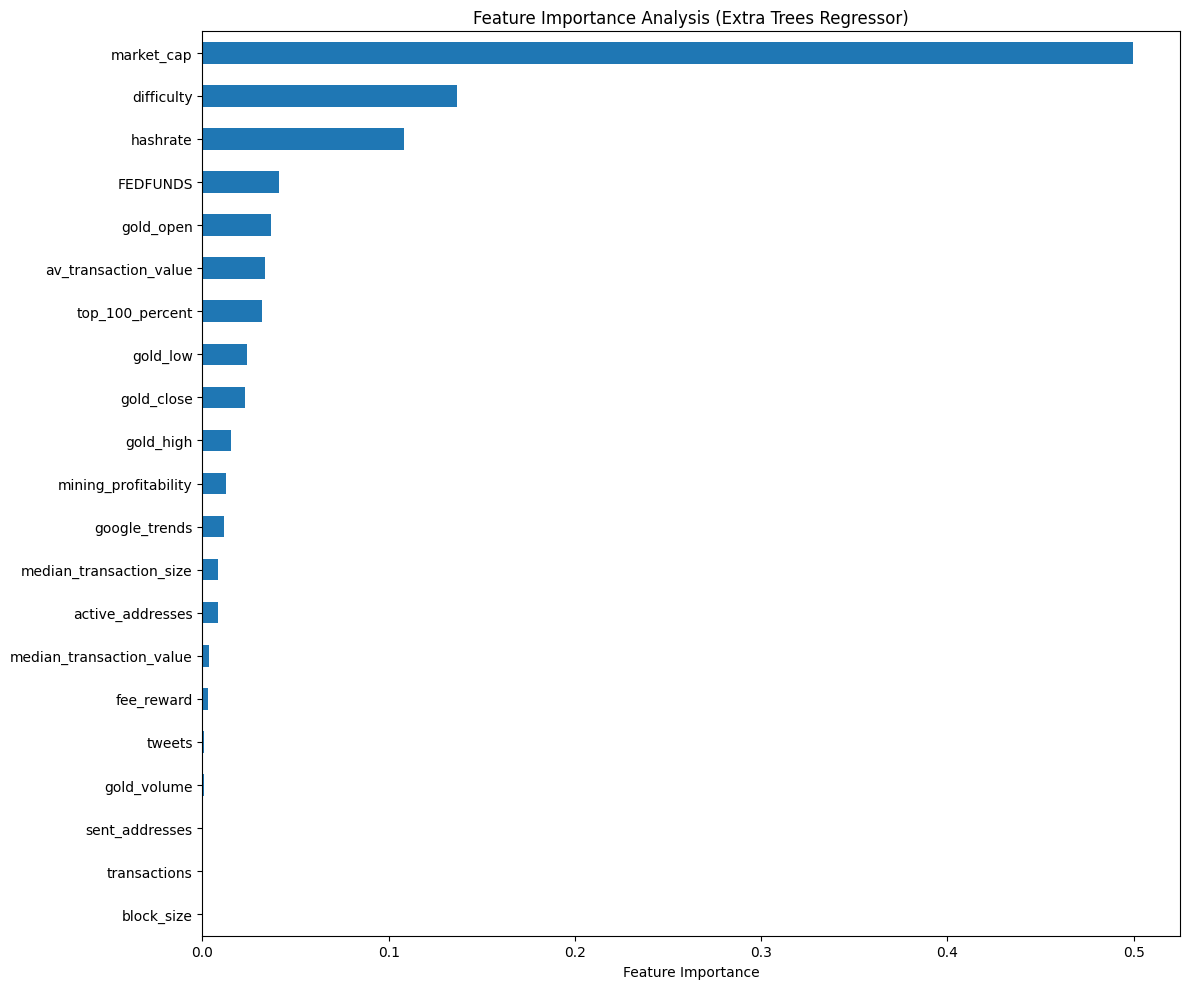


Top 10 most important features:
 1. market_cap               : 0.4999
 2. difficulty               : 0.1368
 3. hashrate                 : 0.1081
 4. FEDFUNDS                 : 0.0410
 5. gold_open                : 0.0371
 6. av_transaction_value     : 0.0334
 7. top_100_percent          : 0.0322
 8. gold_low                 : 0.0239
 9. gold_close               : 0.0227
10. gold_high                : 0.0155


In [20]:
# Ensure Y is aligned with X and handle any remaining missing values
Y_aligned = data["btc_price"].loc[X.index]
Y_aligned = Y_aligned.fillna(Y_aligned.median())

print(f"Data alignment check:")
print(f"  X shape: {X.shape}")
print(f"  Y shape: {Y_aligned.shape}")
print(f"  Indices match: {X.index.equals(Y_aligned.index)}")

# Train Extra Trees model for feature importance
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X, Y_aligned)

print(f"\nFeature importances:")
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances_sorted = feat_importances.sort_values(ascending=True)

# Create a more detailed plot
plt.figure(figsize=(12, 10))
feat_importances_sorted.plot(kind="barh")
plt.xlabel("Feature Importance")
plt.title("Feature Importance Analysis (Extra Trees Regressor)")
plt.tight_layout()
plt.show()

# Display top features
print(f"\nTop 10 most important features:")
for i, (feature, importance) in enumerate(feat_importances.sort_values(ascending=False).head(10).items(), 1):
    print(f"{i:2d}. {feature:25}: {importance:.4f}")

Count the correlations:

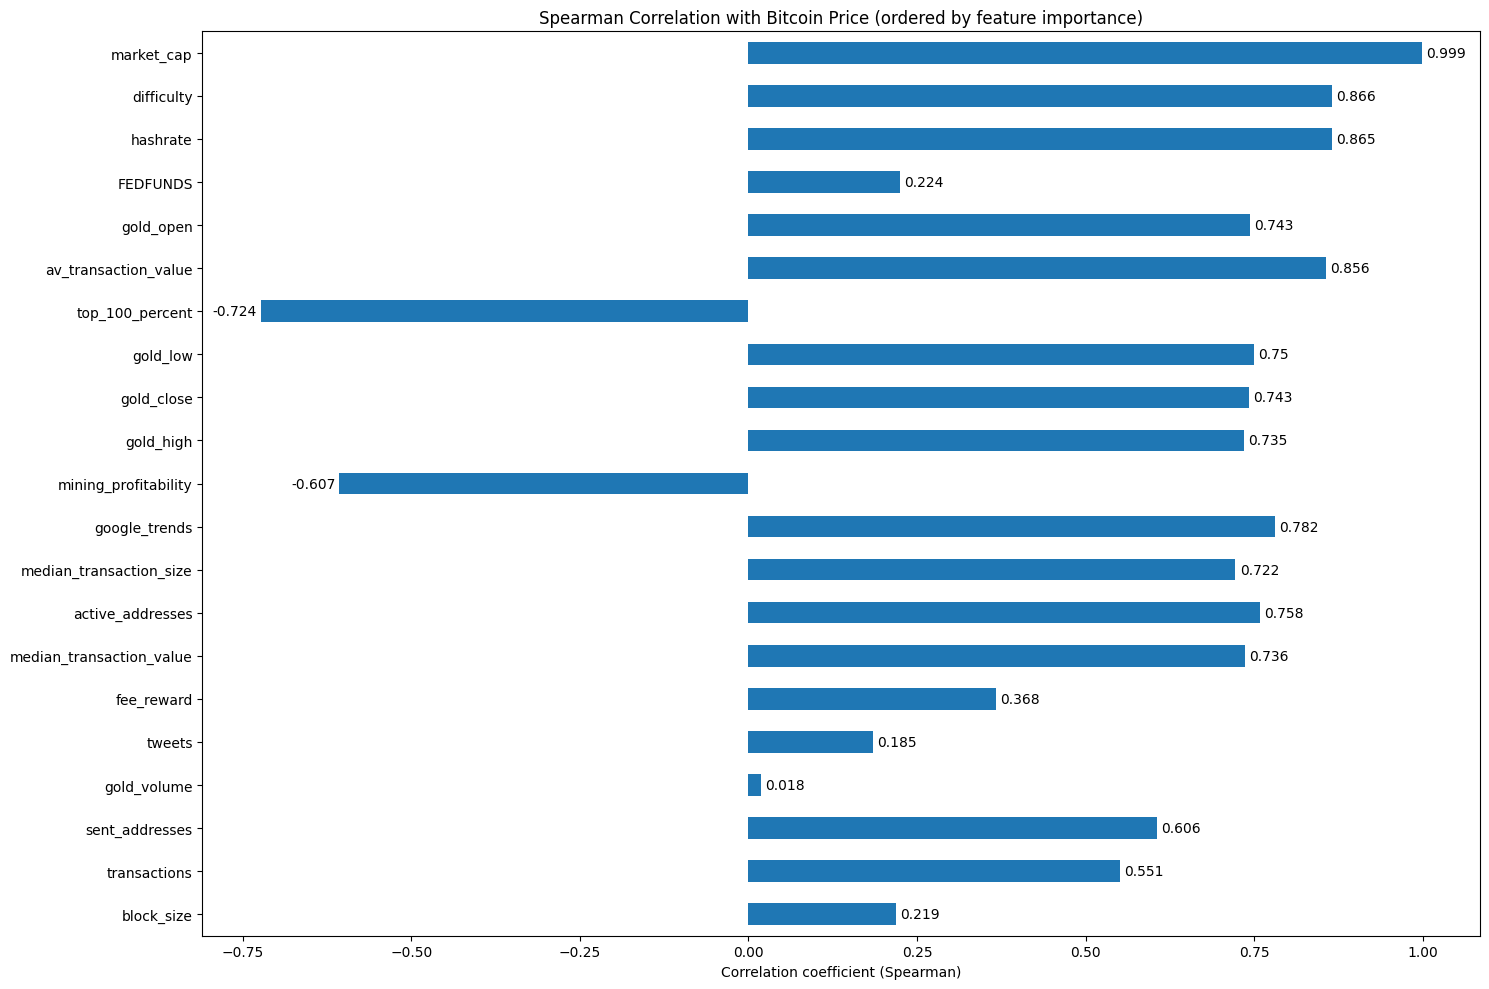


Top 10 correlations (absolute values):
 1. market_cap               :  0.9990 (positive)
 2. difficulty               :  0.8660 (positive)
 3. hashrate                 :  0.8654 (positive)
 4. av_transaction_value     :  0.8560 (positive)
 5. google_trends            :  0.7817 (positive)
 6. active_addresses         :  0.7581 (positive)
 7. gold_low                 :  0.7501 (positive)
 8. gold_open                :  0.7432 (positive)
 9. gold_close               :  0.7428 (positive)
10. median_transaction_value :  0.7359 (positive)


In [21]:
# Calculate correlations using aligned data
correlations = pd.Series([X[x].corr(Y_aligned, method='spearman') for x in X.columns], index=X.columns)
correlations_sorted = correlations.reindex(feat_importances.sort_values(ascending=True).index)

plt.figure(figsize=(15, 10))
corrplot = correlations_sorted.plot(kind="barh")
corrplot.bar_label(corrplot.containers[0], labels=[round(v, 3) for v in correlations_sorted], padding=3)
plt.xlabel("Correlation coefficient (Spearman)")
plt.title("Spearman Correlation with Bitcoin Price (ordered by feature importance)")
plt.tight_layout()
plt.show()

print(f"\nTop 10 correlations (absolute values):")
abs_correlations = correlations.abs().sort_values(ascending=False)
for i, (feature, corr) in enumerate(abs_correlations.head(10).items(), 1):
    direction = "positive" if correlations[feature] > 0 else "negative"
    print(f"{i:2d}. {feature:25}: {correlations[feature]:7.4f} ({direction})")

In [22]:
# 🎯 FEATURE ANALYSIS SUMMARY
print("=" * 80)
print("🎯 FEATURE IMPORTANCE vs CORRELATION SUMMARY")
print("=" * 80)

# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Feature_Importance': feat_importances,
    'Spearman_Correlation': correlations,
    'Abs_Correlation': correlations.abs()
}).sort_values('Feature_Importance', ascending=False)

print(f"\nDataset Information:")
print(f"  • Total features analyzed: {len(X.columns)}")
print(f"  • Data points used: {len(X)}")
print(f"  • Date range: {X.index.min()} to {X.index.max()}")

print(f"\nTop 5 Features by Importance:")
for i, (feature, row) in enumerate(comparison_df.head().iterrows(), 1):
    print(f"  {i}. {feature:20} | Importance: {row['Feature_Importance']:.4f} | Correlation: {row['Spearman_Correlation']:7.4f}")

print(f"\nTop 5 Features by Absolute Correlation:")
top_corr = comparison_df.sort_values('Abs_Correlation', ascending=False).head()
for i, (feature, row) in enumerate(top_corr.iterrows(), 1):
    print(f"  {i}. {feature:20} | Correlation: {row['Spearman_Correlation']:7.4f} | Importance: {row['Feature_Importance']:.4f}")

print(f"\n✅ Analysis completed successfully!")
print(f"✅ av_transaction_size removed (was 100% missing)")
print(f"✅ All features properly aligned with target variable")
print("=" * 80)

🎯 FEATURE IMPORTANCE vs CORRELATION SUMMARY

Dataset Information:
  • Total features analyzed: 21
  • Data points used: 1976
  • Date range: 2015-08-01 to 2020-12-27

Top 5 Features by Importance:
  1. market_cap           | Importance: 0.4999 | Correlation:  0.9990
  2. difficulty           | Importance: 0.1368 | Correlation:  0.8660
  3. hashrate             | Importance: 0.1081 | Correlation:  0.8654
  4. FEDFUNDS             | Importance: 0.0410 | Correlation:  0.2245
  5. gold_open            | Importance: 0.0371 | Correlation:  0.7432

Top 5 Features by Absolute Correlation:
  1. market_cap           | Correlation:  0.9990 | Importance: 0.4999
  2. difficulty           | Correlation:  0.8660 | Importance: 0.1368
  3. hashrate             | Correlation:  0.8654 | Importance: 0.1081
  4. av_transaction_value | Correlation:  0.8560 | Importance: 0.0334
  5. google_trends        | Correlation:  0.7817 | Importance: 0.0115

✅ Analysis completed successfully!
✅ av_transaction_size remo